# Q2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import mode
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Helper functions

In [3]:
def find_centroids(k,n):
    random.seed(5)
    idx=[]
    for i in range(k):
        idx.append(random.randint(0,n-1))
    return idx

In [4]:
def find_clusters(df,c,k,n):
    dist=[[] for _ in range(k)]
    for i in range(n):
        temp=[]
        for j in range(k):
            dist_temp= np.sum((df[i]-c[j])**2)
            temp.append(dist_temp)
        location=temp.index(min(temp))
        dist[location].append(i)
    return dist

In [5]:
def find_new_centroids(df,dist,c,k,m):
    for i in range(k):
      temp_mean=[0 for _ in range(m)]
    for j in range(len(dist[i])):
        id=dist[i][j]
        temp=0
        for kk in range(m):
            temp_mean[kk]+=df[id][kk]/len(dist[i])
    for j in range(m):
        c[i][j]=temp_mean[j]
    return c


In [6]:
def plot_2D(dist,df,c,k):
    plt.figure(figsize=[10,6])
    distx=[[] for i in range(k)]
    disty=[[] for i in range(k)]
    for i in range(k):
        for j in range(len(dist[i])):
            id=dist[i][j]
            distx[i].append(df[id][0])
            disty[i].append(df[id][1])
    cx=[];cy=[]
    for i in range(k):
        cx.append(c[i][0])
        cy.append(c[i][1])
        sns.scatterplot(distx[i],disty[i],markers='o',s=200)
    sns.scatterplot(cx,cy,color='.2',marker='*',s=400)
    plt.grid()
    plt.title('K='+str(k),fontsize=15)
    plt.xlabel('X',fontsize=15)
    plt.ylabel('Y',fontsize=15)
    

In [7]:
def k_means(df,k,plot):
    n=df.shape[0]
    m=df.shape[1]
    
    #indices of centroid
    idx=find_centroids(k,n)

    #to store the centroids kxm
    c=[[] for _ in range(k)]
    cprev=[[] for _ in range(k)]

    for i in range(k):
        for j in range(m):
            c[i].append(df[idx[i]][j])
            cprev[i].append(df[idx[i]][j])
    
    #to get the points in a given cluster kxdim
    #just store the indices in the original array
    dist=[[] for _ in range(k)]
    itr=0
    flag=False
    while flag==False and itr!=1000:
        
        #k clusters with elements in the cluster
        dist=find_clusters(df,c,k,n)
            
        #store previous centroids
        cprev=np.copy(c)

        #finding the new centroids
        c=find_new_centroids(df,dist,c,k,m)
        
        count=0
        for i in range(k):
            for j in range(len(c[0])):
                if c[i][j]==cprev[i][j]:
                    count+=1
        if count==k*len(c[0]):
            break
        itr+=1


    if plot==True:
        plot_2D(dist,df,c,k)

    return c,dist


In [8]:
def find_inertia(c,d,df):
    ans=0
    for i in range(len(c)):
        indices=d[i]
        for kk in range(len(indices)):
            for j in range(len(c[0])):
                ans+=(c[i][j]-df[indices[kk]][j])**2
    return ans

# Q2 a)

In [ ]:
data = pd.read_excel('Question2a.xlsx')
data.head()

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


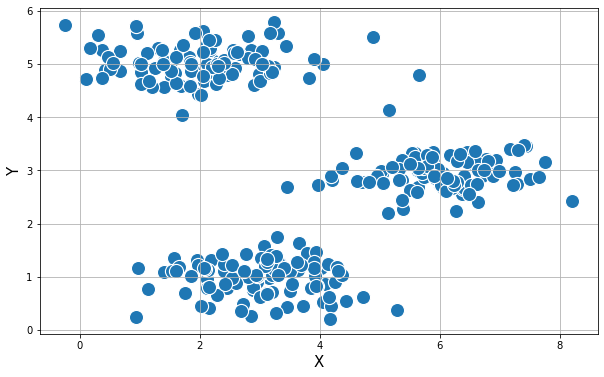

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['x'],data['y'],s=200)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.grid()

In [ ]:
# Standardize data
df=[]
df.append(data['x'])
df.append(data['y'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##Our function

In [ ]:
# for i in range(1,11):
#   c_q1,dist_q1=k_means(df,i,True)

#Q2a 3) Visualize the cluster formation for each k

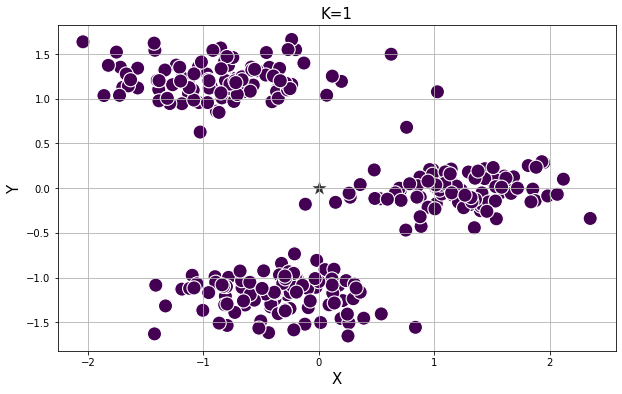

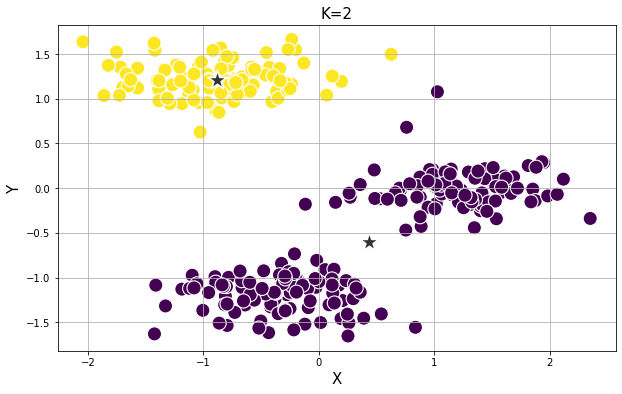

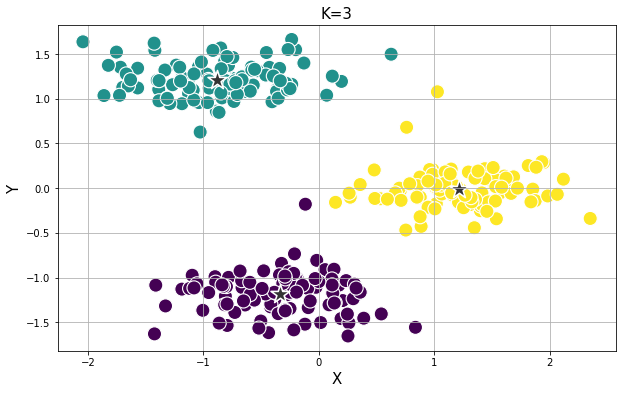

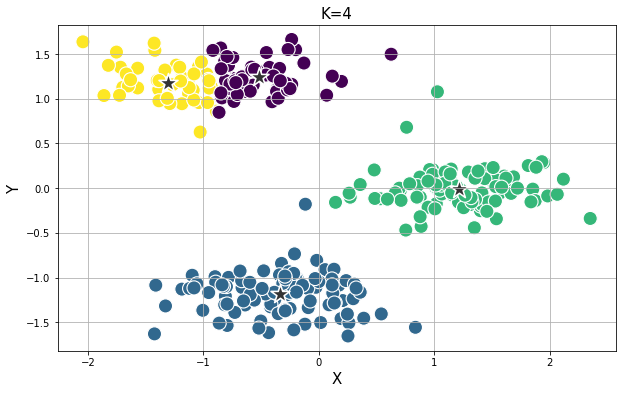

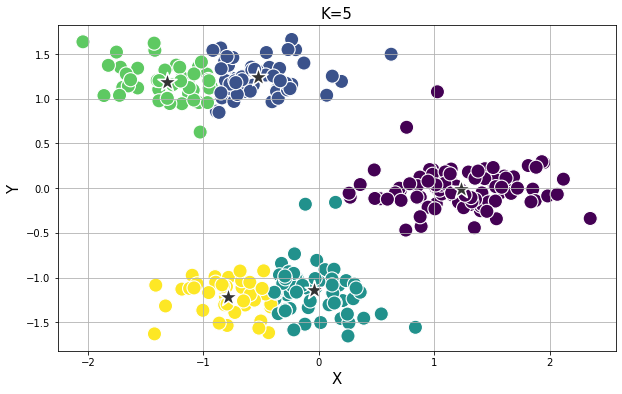

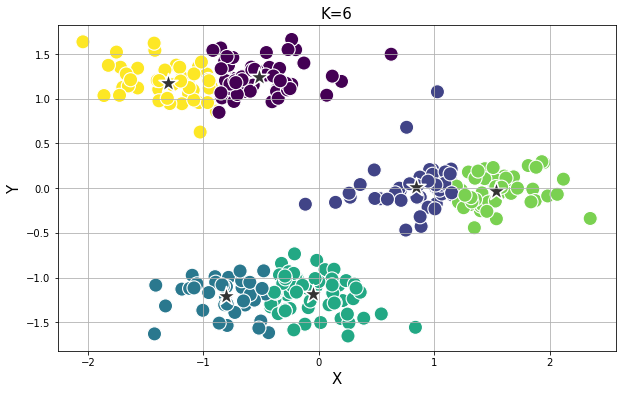

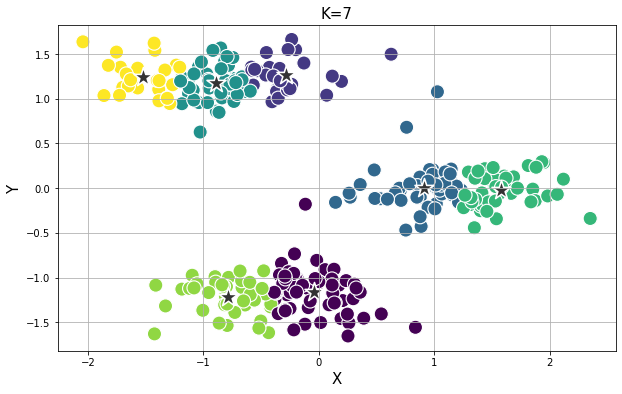

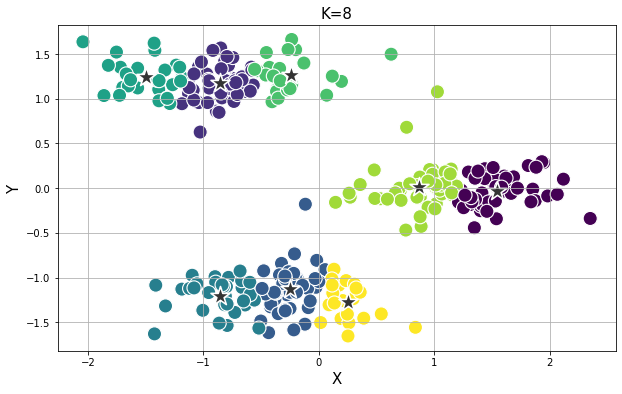

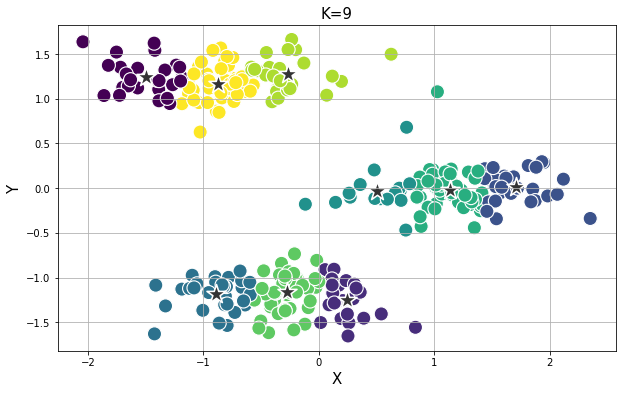

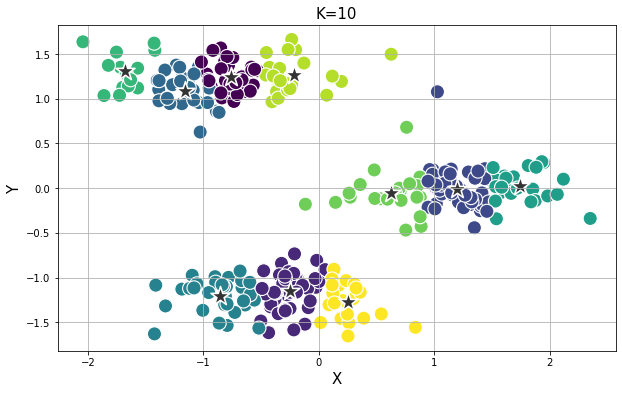

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled)
  y_pred = kmeans.predict(df_scaled)
  
  # Creating plot
  plt.figure(figsize=[10,6])
  sns.scatterplot(df_scaled[:,0], df_scaled[:,1], c=y_pred, s=200)
  centers = kmeans.cluster_centers_
  sns.scatterplot(centers[:,0],centers[:,1],color='.2',marker='*',s=400)
  plt.grid()
  plt.title('K='+str(i),fontsize=15)
  plt.xlabel('X',fontsize=15)
  plt.ylabel('Y',fontsize=15)
  plt.show()
  

In [ ]:
# Calculate SSE
SSE_q2a_inbuilt=[]
n=11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE_q2a_inbuilt.append(kmeans.inertia_)

#Q2a 4) Plot elbow curve

Text(0.5, 1.0, 'Elbow Curve')

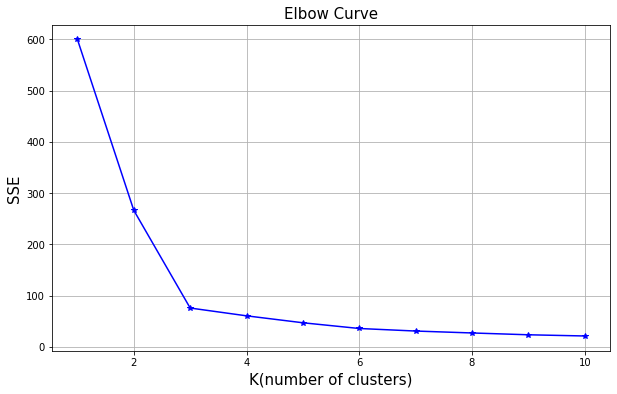

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q2a_inbuilt,'b-*')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)

# Q2b

In [9]:
data2 = pd.read_excel('Question2b.xls')
data2.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


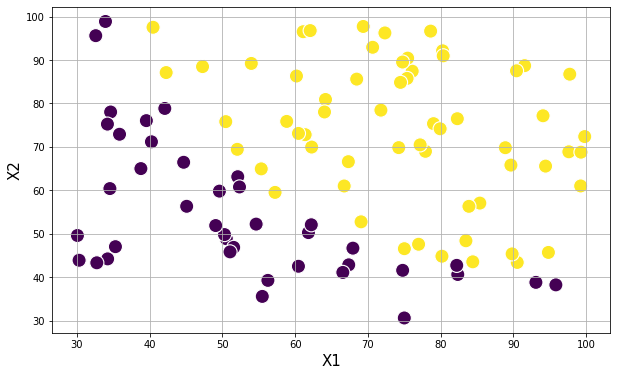

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data2['x1'],data2['x2'],s=200,c=data2['y'])
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.grid()

In [14]:
# Standardize data
df2=[]
df2.append(data2['x1'])
df2.append(data2['x2'])
df2=np.array(df2).transpose()
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df2)

#Q2b 3) Visualize the cluster formation for each k

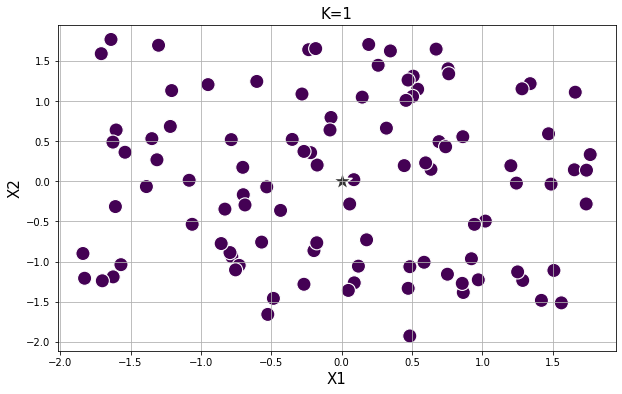

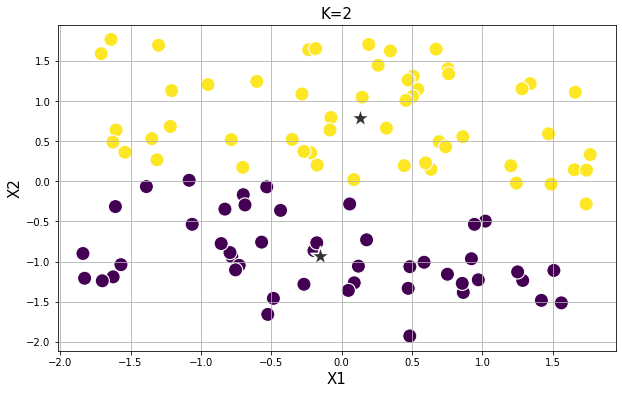

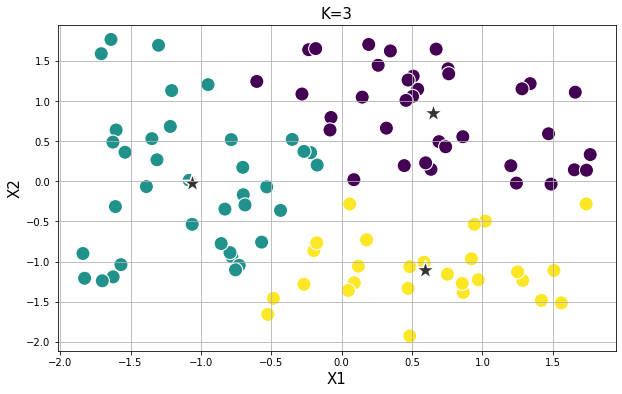

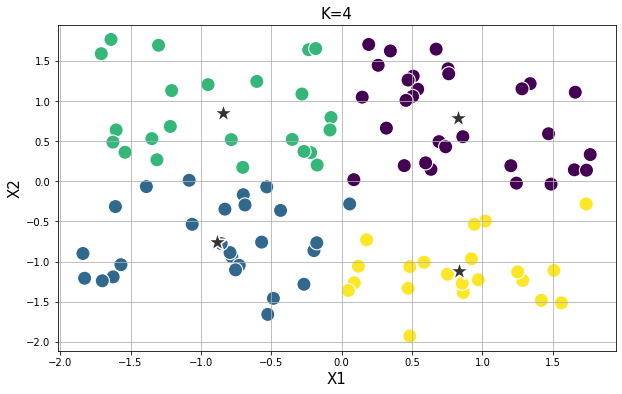

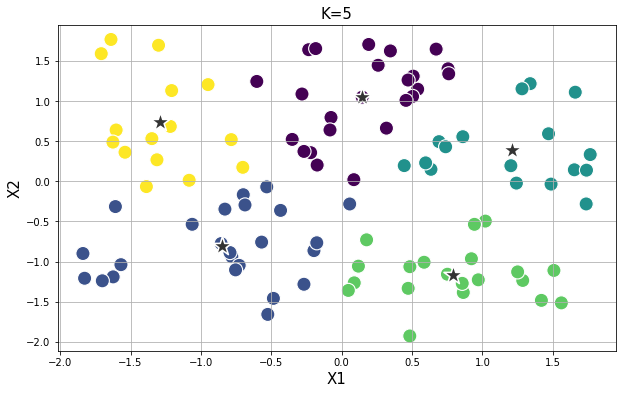

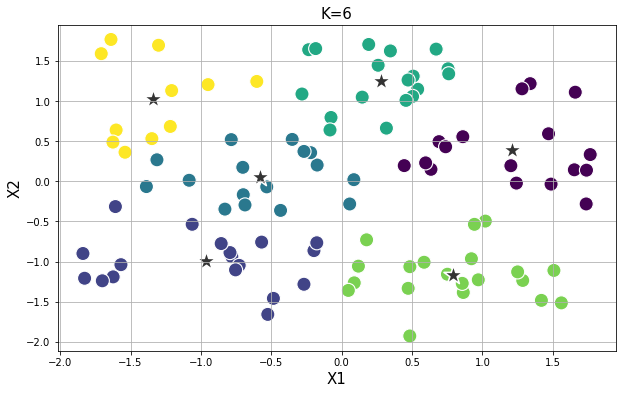

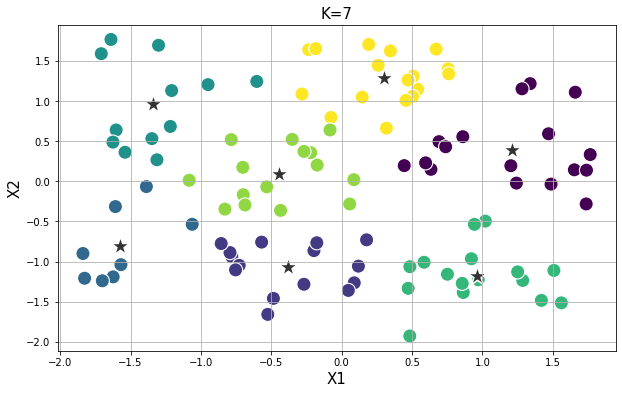

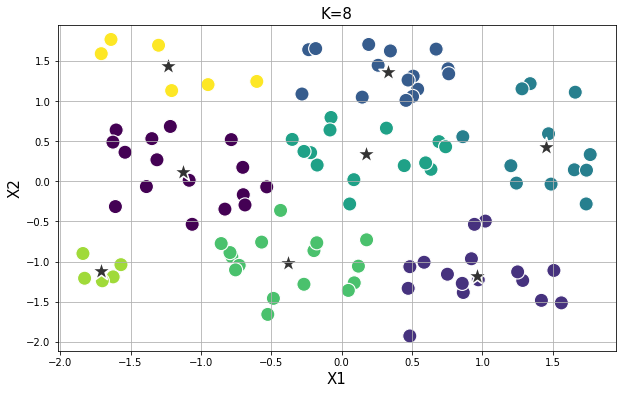

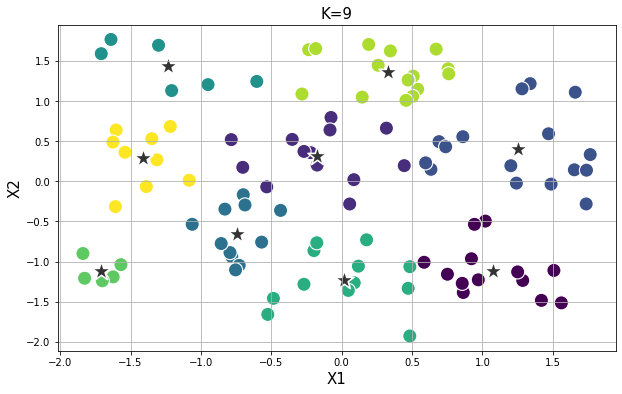

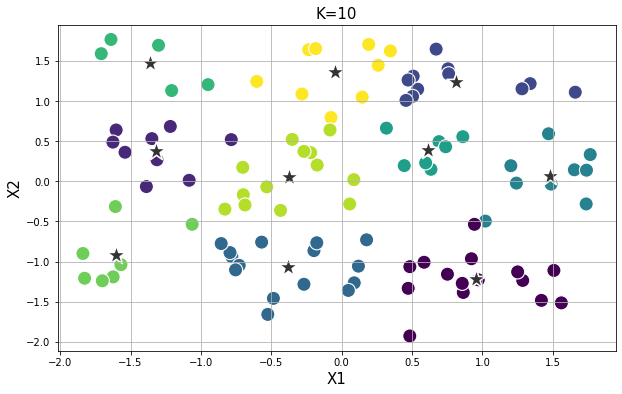

In [16]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled2)
  y_pred2 = kmeans.predict(df_scaled2)
  
  # Creating plot
  plt.figure(figsize=[10,6])
  sns.scatterplot(df_scaled2[:,0], df_scaled2[:,1], c=y_pred2, s=200)
  centers = kmeans.cluster_centers_
  sns.scatterplot(centers[:,0],centers[:,1],color='.2',marker='*',s=400)
  plt.grid()
  plt.title('K='+str(i),fontsize=15)
  plt.xlabel('X1',fontsize=15)
  plt.ylabel('X2',fontsize=15)
  plt.show()

In [17]:
# Calculate SSE
SSE_q2b_inbuilt=[]
n=11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled2)
    SSE_q2b_inbuilt.append(kmeans.inertia_)

#Q2b 4) Plot elbow curve

Text(0.5, 1.0, 'Elbow Curve')

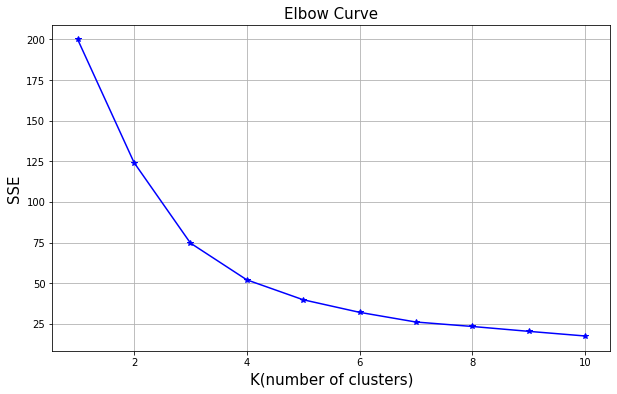

In [18]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q2b_inbuilt,'b-*')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)